<a href="https://colab.research.google.com/github/Sedowlas/EDA/blob/main/Fitness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Команда определяет следующие переменные клиента для изучения:   приобретенный продукт, TM195, TM498 или TM798;   
пол;   
возраст, в годах;  
образование, в годах;   
статус отношений, один или партнер;   
годовой доход семьи ($);   
среднее количество раз, когда клиент планирует использовать беговую дорожку каждую неделю;  
среднее количество миль, которые клиент ожидает пройти/пробежать каждую неделю;   
и самооценка фитнеса по шкале от 1 до 5, где 1-плохая форма, а 5-отличная форма.   
Выполните описательную аналитику, чтобы создать профиль клиента для каждой линейки беговых дорожек CardioGood Fitness.



#Заливка данных

https://drive.google.com/file/d/1DBiURHCKzgyY0quwM6L2P-LE2tRg2Pkn/view?usp=sharing

In [ ]:
! gdown --id 1DBiURHCKzgyY0quwM6L2P-LE2tRg2Pkn

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1DBiURHCKzgyY0quwM6L2P-LE2tRg2Pkn
To: /content/CardioGoodFitness.csv
100% 7.46k/7.46k [00:00<00:00, 9.86MB/s]


#Предобработка

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/CardioGoodFitness.csv')

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.isna().mean()

product          0.0
age              0.0
gender           0.0
education        0.0
maritalstatus    0.0
usage            0.0
fitness          0.0
income           0.0
miles            0.0
dtype: float64

In [ ]:
len(df)

180

#Анализ

In [ ]:
df['product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: product, dtype: int64

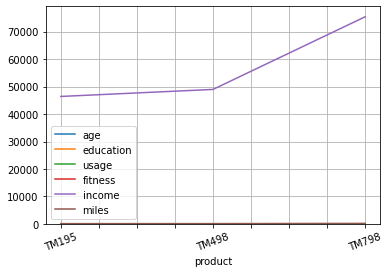

In [ ]:
df.groupby('product').mean().plot(rot=20,ylim=0,grid=True)

Больше всего доход принес ТМ798

In [ ]:
df.groupby('product')['age'].agg(['count','mean'])

,count,mean
product,,
TM195,80,28.55
TM498,60,28.90
TM798,40,29.10


Видим что в среднем клиенты чаще берут ТМ798 

In [ ]:
df.groupby('gender')['fitness'].agg(['count','mean','median'])

,count,mean,median
gender,,,
Female,76,3.026316,3.0
Male,104,3.519231,3.0


Мужчины купили тренажоры больше чем девушки

In [ ]:
df.groupby('product')['education'].agg(['count','mean','median'])

,count,mean,median
product,,,
TM195,80,15.037500,16.0
TM498,60,15.116667,16.0
TM798,40,17.325000,18.0


In [ ]:
df['age_group'] = pd.cut(df['age'],30)

In [ ]:
df.groupby('age_group')['education'].agg(['count','mean','median'])

,count,mean,median
age_group,,,
"(17.968, 19.067]",5,13.800000,14.0
"(19.067, 20.133]",5,13.800000,14.0
"(20.133, 21.2]",7,14.142857,14.0
"(21.2, 22.267]",7,15.142857,14.0
"(22.267, 23.333]",18,15.500000,16.0
"(23.333, 24.4]",12,15.416667,16.0
"(24.4, 25.467]",25,15.440000,14.0
"(25.467, 26.533]",12,16.250000,16.0
"(26.533, 27.6]",7,16.142857,16.0


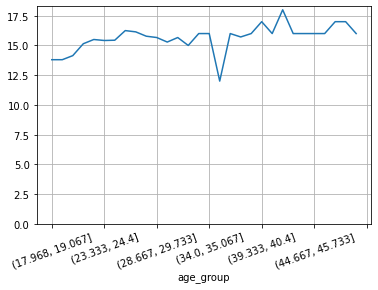

In [ ]:
df.groupby('age_group')['education'].mean().plot(rot=20,ylim=0,grid=True)

Хуже всего в образовании был 1 человек в возрасте 35-36 лет

In [ ]:
df.head()

,product,age,gender,education,maritalstatus,usage,fitness,income,miles,age_group
0,TM195,18,Male,14,Single,3,4,29562,112,"(17.968, 19.067]"
1,TM195,19,Male,15,Single,2,3,31836,75,"(17.968, 19.067]"
2,TM195,19,Female,14,Partnered,4,3,30699,66,"(17.968, 19.067]"
3,TM195,19,Male,12,Single,3,3,32973,85,"(17.968, 19.067]"
4,TM195,20,Male,13,Partnered,4,2,35247,47,"(19.067, 20.133]"


In [ ]:
df.groupby('maritalstatus')['fitness'].agg(['count','mean'])

,count,mean
maritalstatus,,
Partnered,107,3.271028
Single,73,3.369863


Пары купили тренажоры больше чем одиночки

In [ ]:
df['age_group2'] = pd.cut(df['age'],30)

In [ ]:
df.groupby('age_group2')['usage'].agg(['count','mean','median'])

,count,mean,median
age_group2,,,
"(17.968, 19.067]",5,3.000000,3.0
"(19.067, 20.133]",5,3.000000,3.0
"(20.133, 21.2]",7,3.142857,3.0
"(21.2, 22.267]",7,3.428571,3.0
"(22.267, 23.333]",18,3.388889,3.0
"(23.333, 24.4]",12,3.750000,4.0
"(24.4, 25.467]",25,3.320000,3.0
"(25.467, 26.533]",12,3.583333,4.0
"(26.533, 27.6]",7,3.571429,4.0


Хуже всего используется в возрасте 30-32, 36-37

In [ ]:
df.groupby('age_group2')['fitness'].agg(['count','mean','median'])

,count,mean,median
age_group2,,,
"(17.968, 19.067]",5,3.200000,3.0
"(19.067, 20.133]",5,2.800000,3.0
"(20.133, 21.2]",7,3.000000,3.0
"(21.2, 22.267]",7,3.428571,3.0
"(22.267, 23.333]",18,3.000000,3.0
"(23.333, 24.4]",12,3.750000,3.5
"(24.4, 25.467]",25,3.360000,3.0
"(25.467, 26.533]",12,3.250000,3.0
"(26.533, 27.6]",7,3.142857,3.0


Хуже всего фитнес в возрасте 45-46

In [ ]:
df.groupby('product')['fitness'].agg(['count','mean','median'])

,count,mean,median
product,,,
TM195,80,2.9625,3.0
TM498,60,2.9000,3.0
TM798,40,4.6250,5.0


ТМ798 берут те люди у кого фитнес не ниже 4

In [ ]:
df.groupby('maritalstatus')['income'].agg(['count','mean','median'])

,count,mean,median
maritalstatus,,,
Partnered,107,55763.000000,52302.0
Single,73,50724.424658,48658.0


Средний доход семьи и одиночек

In [ ]:
df.groupby('usage')['fitness'].agg(['count','mean','median'])

,count,mean,median
usage,,,
2,33,2.515152,3.0
3,69,3.000000,3.0
4,52,3.596154,3.0
5,17,4.411765,5.0
6,7,4.857143,5.0
7,2,5.000000,5.0


Среднее количество использований беговой дорожки 4-5 раз

In [ ]:
df.groupby('miles')['fitness'].agg(['count','mean','median'])

,count,mean,median
miles,,,
21,1,1.000000,1.0
38,3,2.000000,2.0
42,4,2.000000,2.0
47,9,1.888889,2.0
53,7,2.285714,2.0
56,6,3.000000,3.0
64,6,2.833333,3.0
66,10,2.700000,3.0
74,3,3.000000,3.0


In [ ]:
df['miles_group'] = pd.cut(df['miles'],10)

In [ ]:
df.groupby('miles_group')['fitness'].agg(['count','mean','median'])

,count,mean,median
miles_group,,,
"(20.661, 54.9]",24,2.000000,2.0
"(54.9, 88.8]",63,2.984127,3.0
"(88.8, 122.7]",51,3.352941,3.0
"(122.7, 156.6]",14,4.142857,4.0
"(156.6, 190.5]",16,4.562500,5.0
"(190.5, 224.4]",7,4.714286,5.0
"(224.4, 258.3]",1,5.000000,5.0
"(258.3, 292.2]",2,5.000000,5.0
"(292.2, 326.1]",1,5.000000,5.0


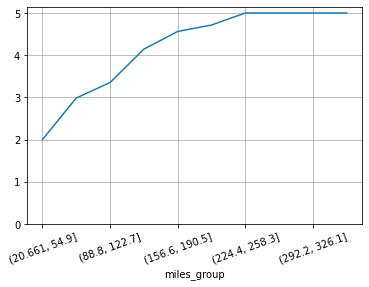

In [ ]:
df.groupby('miles_group')['fitness'].mean().plot(rot=20,ylim=0,grid=True)

Среднее колчиство миль в неделю которое пробежит клиент (122-190)

In [ ]:
(df.groupby(['maritalstatus','product','gender'])
[['age','fitness','income']]
.agg({'age':['count','median',],
      'fitness':['median']}))

age        fitness
                             count median  median
maritalstatus product gender                     
Partnered     TM195   Female    27   27.0     3.0
                      Male      21   30.0     3.0
              TM498   Female    15   31.0     3.0
                      Male      21   31.0     3.0
              TM798   Female     4   29.0     5.0
                      Male      19   27.0     5.0
Single        TM195   Female    13   26.0     3.0
                      Male      19   25.0     3.0
              TM498   Female    14   25.5     3.0
                      Male      10   25.0     3.0
              TM798   Female     3   24.0     4.0
                      Male      14   25.5     5.0

Профиль клиенат:
1. Женщины одиночки - 28 лет, средняя физ. форма, больше всего используют и покупают тренажер ТМ498 - средний в цене. 
2. Семейные женщины -  28 лет, средняя физ. форма, больше всего берут тренажер ТМ195 - дешевый.  
3. Мужчины одиночки - физ.форма выше среднего, возраст от 25 лет, чаще всего покупают ТМ195 - самый дешевый тренажер.   
4. Семейные мужчины - 30 лет, средняя физ. форма, чаще покупают ТМ195 и ТМ498.  
5. Самый дорогой тренажер - ТМ798 берут мужчины от 28 лет с хорошей физ. формой.  
6. Из одиночек и семейных пар больше всего тренажеры берут мужчины, от 30 лет, ТМ195 - дешевый.
